In [3]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

import sys
sys.path.append('../..')
import utils.plotting as plotting

In [4]:
df = pd.read_csv(
    "../../data/SG-AM.csv", 
    parse_dates=["dataNotificacao", "dataEncerramento", "dataInicioSintomas"], 
    encoding="utf-8", 
    sep=";"
)

df[:5]

/tmp/ipykernel_487922/682024725.py:1: DtypeWarning: Columns (12,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,"Coriza, Dor de Cabeça, Febre, Tosse",Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2023-02-10,NaN,NaN,NaN,40.0
1,"Coriza, Dor de Cabeça, Tosse, Febre",Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2022-10-28,NaN,NaN,NaN,NaN
2,Assintomático,Não,Parda,NaN,NaN,Não,NaN,Gestante,Feminino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2023-03-13,NaN,NaN,NaN,31.0
3,"Coriza, Dor de Cabeça, Tosse, Febre, Dispneia,...",Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2022-01-20,NaN,NaN,NaN,NaN
4,"Coriza, Febre, Dor de Garganta",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Masculino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2023-04-03,NaN,NaN,NaN,25.0


In [5]:

date_range = pd.date_range(
    # start=df['dataInicioSintomas'].min(), # Notificação ou início dos sintomas?
    start=df['dataNotificacao'].min(),
    end=df['dataEncerramento'].max(),
    freq='D'
)

sir = pd.DataFrame(
    index=date_range, 
    columns=['I', 'R'], 
    dtype='int'
)

In [6]:
df[df["dataEncerramento"].isnull()].shape[0]

84547

In [7]:
df[df["dataInicioSintomas"].isnull()].shape[0]

72651

In [8]:
pd.set_option('future.no_silent_downcasting', True)
sir = sir.fillna(0)

for i, row in df.iterrows():
    
    # start=df['dataInicioSintomas'].min() # Notificação ou início dos sintomas?
    start = row['dataNotificacao']
    end = start + pd.Timedelta(days=7)
    
    if pd.isna(end):  
        sir.loc[start:, 'I'] += 1
    else: 
        assert start <= end, f"Inconsistency at row {i}, start={start}, end={end}"
        sir.loc[start:end - pd.Timedelta(days=1), 'I'] += 1
        sir.loc[end:, 'R'] += 1


In [9]:
sir

,I,R
2020-01-12,1.0,0.0
2020-01-13,1.0,0.0
2020-01-14,1.0,0.0
2020-01-15,1.0,0.0
2020-01-16,1.0,0.0
...,...,...
2025-12-05,0.0,207554.0
2025-12-06,0.0,207554.0
2025-12-07,0.0,207554.0
2025-12-08,0.0,207554.0


In [10]:
sir.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2159 entries, 2020-01-12 to 2025-12-09
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       2159 non-null   float64
 1   R       2159 non-null   float64
dtypes: float64(2)
memory usage: 115.1 KB


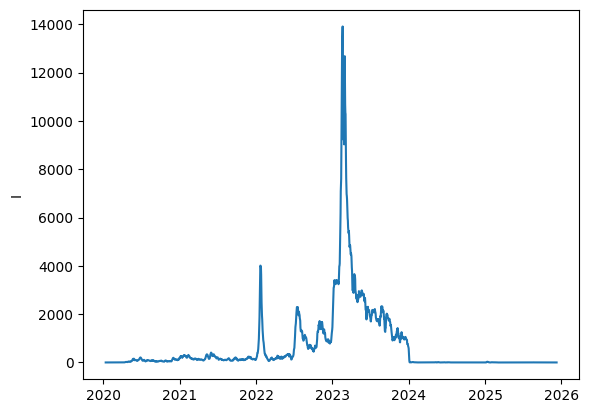

In [11]:
sns.lineplot(data=sir["I"])
plt.show()

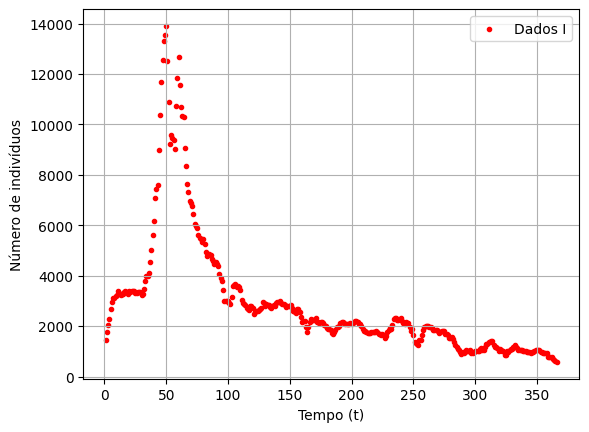

In [13]:
data2023 = sir["I"]["2023-01-01":"2024-01-01"].to_numpy()
plotting.plot_incidence_data(data2023, "data-sus-AM-2023")

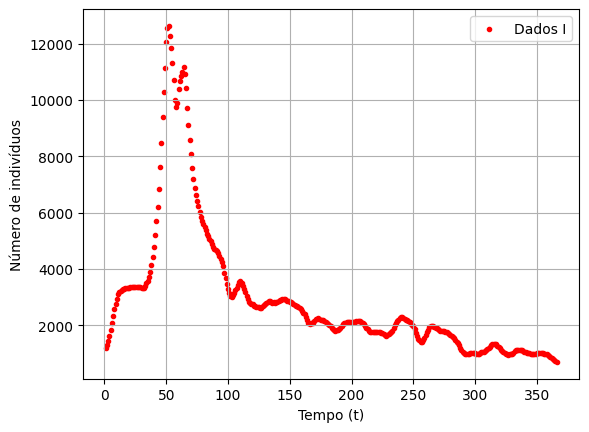

In [14]:
smoothed_sir = sir.rolling(window=7).mean()
smoothed_data2023 = smoothed_sir["I"]["2023-01-01":"2024-01-01"]
plotting.plot_incidence_data(smoothed_data2023, "smoothed-data-sus-AM-2023") 

In [ ]:
smoothed_data2023.to_csv('../../data/sir-am-7d.csv', index=False)

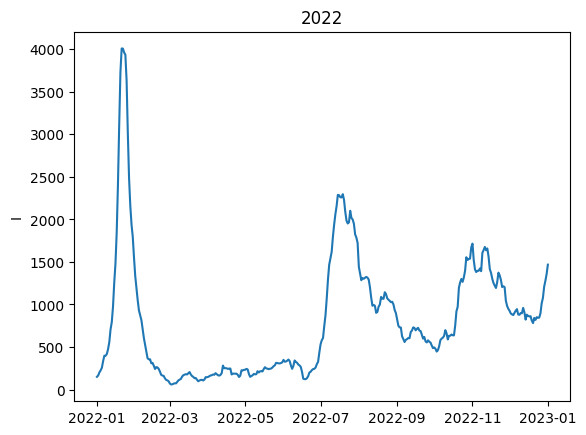

In [ ]:
sns.lineplot(data=sir["I"]["2022-01-01":"2023-01-01"])
plt.title("2022")
plt.show()

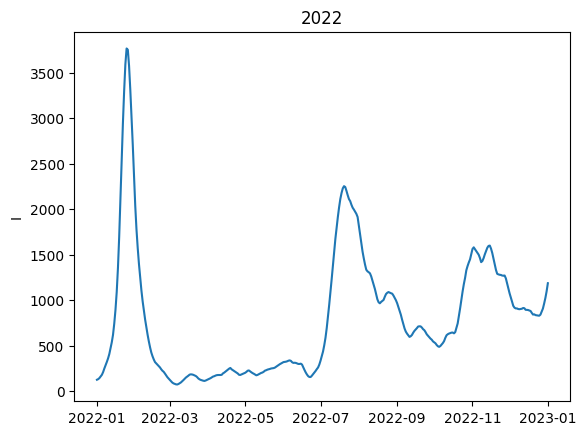

In [13]:
smoothed_sir = sir.rolling(window=7).mean() 
sns.lineplot(data=smoothed_sir["I"]["2022-01-01":"2023-01-01"])
plt.title("2022")
plt.show()